Makes the plots for the fake data oscillation studies. This was used to test the analysis before looking at the data. Inputs to this notebook can be found: /cluster/tufts/wongjiradlabnu/gen1_oscanalysis/SBNfitoutputs/

In [17]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from matplotlib import cm
from root_pandas import read_root
import scipy.stats
from scipy import stats
from matplotlib import gridspec
import matplotlib.lines as mlines
import ROOT
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
from scipy.stats import chi2
from scipy import interpolate
import pandas as pd
import math
import matplotlib.colors as colors
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import pickle as pkl

Get values from text files which have the frquentist study results

In [18]:
# we're going to load in three arrays - one for each parameter
with open("bins_sens.txt","r") as bins:
    lines = bins.readlines()
    lines[0].strip()
    lines[1].strip()
    lines[2].strip()
    vals0 = lines[0].split(" ")
    vals1 = lines[1].split(" ")
    vals2 = lines[2].split(" ")
    m41_list= []
    ue4_list= []
    um4_list= []
    for v in range(len(vals0)-1):
        m41_list.append(float(vals0[v]))
    for v in range(len(vals1)-1):
        ue4_list.append(float(vals1[v]))
    for v in range(len(vals2)-1):
        um4_list.append(float(vals2[v]))
print("m values:", m41_list )
print("ue4 values:",ue4_list)
print("um4 values:",um4_list)

# m41_list.pop()
# ue4_list.pop()
# um4_list.pop()

m values: [0.0120226, 0.017378, 0.0251189, 0.0363078, 0.0524807, 0.0758578, 0.109648, 0.158489, 0.229087, 0.331131, 0.47863, 0.691831, 1.0, 1.44544, 2.0893, 3.01995, 4.36516, 6.30957, 9.12011, 13.1826, 19.0546, 27.5423, 39.8107, 57.544, 83.1764, 120.226]
ue4 values: [0.01, 0.0116939, 0.0136747, 0.015991, 0.0186997, 0.0218672, 0.0255713, 0.0299028, 0.034968, 0.0408911, 0.0478176, 0.0559174, 0.0653891, 0.0764653, 0.0894176, 0.104564, 0.122276, 0.142988, 0.167209, 0.195532, 0.228653, 0.267384, 0.312675, 0.365639, 0.427574, 0.5]
um4 values: [0.01, 0.0116939, 0.0136747, 0.015991, 0.0186997, 0.0218672, 0.0255713, 0.0299028, 0.034968, 0.0408911, 0.0478176, 0.0559174, 0.0653891, 0.0764653, 0.0894176, 0.104564, 0.122276, 0.142988, 0.167209, 0.195532, 0.228653, 0.267384, 0.312675, 0.365639, 0.427574, 0.5]


In [19]:
# initialize arr to fill
chi2_arr1=[]
chi2_min1 = []
with open("chis_fakedata1.txt","r") as chis:
# with open("space.txt","r") as chis:

    lines = chis.readlines()
    for line in range(len(lines)):
        if line==len(lines)-1:
            chi2_min1 = lines[line].split(" ")
        else:
            chi2_arr1.append(float(lines[line]))

for i in range(len(chi2_min1)):
    chi2_min1[i]=float(chi2_min1[i])

print("fakedata1:",chi2_min1)


chi2_arr2=[]
chi2_min2 = []
with open("chis_fakedata2.txt","r") as chis:
# with open("space.txt","r") as chis:

    lines = chis.readlines()
    for line in range(len(lines)):
        if line==len(lines)-1:
            chi2_min2 = lines[line].split(" ")
        else:
            chi2_arr2.append(float(lines[line]))

for i in range(len(chi2_min2)):
    chi2_min2[i]=float(chi2_min2[i])

print("fakedata2:",chi2_min2)

fakedata1: [228.442, 0.573981, 0.468532, 0.498909]
fakedata2: [151.455, 1.84328, 0.0112802, 0.252603]


In [20]:
# change chi2 arr to 25x25x25 for 3d plot
print("fakedata set 1")
chi_arr_sens1=np.zeros((25,25,25))
minpt1 =1000000
for pt in range(len(chi2_arr1)):
    if chi2_arr1[pt]<minpt1: 
        minpt1 = chi2_arr1[pt]
print("grid search min:",minpt1,"minimizer min:",chi2_min1[0])

sumex1=0
for i in range(len(chi2_arr1)):
    chi2_arr1[i]=chi2_arr1[i]-chi2_min1[0]
    val = chi2_arr1[i]
    if (val > 6.25):
        sumex1+=1
        
print("size of excluded region:",sumex1,float(sumex1)/float(len(chi2_arr1)))

for pt in range(len(chi2_arr1)):
    #this is a mess, but works. Didn't want to hardcode any numbers
    m_id = math.floor(pt/((25*25)))
    # need the subtraction term so that it resets everytime m41 increases
    ue4_id = math.floor((pt-m_id*25*25)/(25))
    um4_id = pt % (25)
#     print(pt,m_id,ue4_id,um4_id)
    chi_arr_sens1[ue4_id][m_id][um4_id]=chi2_arr1[pt]
 
print()
print("fakedata set 2")
chi_arr_sens2=np.zeros((25,25,25))
minpt2 =1000000
for pt in range(25):
    if chi2_arr2[pt]<minpt2: 
        minpt2 = chi2_arr2[pt]
print("grid search min:",minpt2,"minimizer min:",chi2_min2[0])

sumex2=0
for i in range(len(chi2_arr2)):
    chi2_arr2[i]=chi2_arr2[i]-chi2_min2[0]
    val = chi2_arr2[i]
    if (val > 6.25):
        sumex2+=1
        
print("size of excluded region:",sumex2,float(sumex2)/float(len(chi2_arr2)))

for pt in range(len(chi2_arr2)):
    #this is a mess, but works. Didn't want to hardcode any numbers
    m_id = math.floor(pt/(25*25))
    # need the subtraction term so that it resets everytime m41 increases
    ue4_id = math.floor((pt-m_id*25*25)/(25))
    um4_id = pt % (25)
    chi_arr_sens2[ue4_id][m_id][um4_id]=chi2_arr2[pt]

fakedata set 1
grid search min: 230.62 minimizer min: 228.442
size of excluded region: 15622 0.999808

fakedata set 2
grid search min: 156.273 minimizer min: 151.455
size of excluded region: 2236 0.143104


In [21]:
confidence_arr1=np.copy(chi_arr_sens1)
for i in range(25):
    for j in range(25):
        for k in range(25):
            delta=chi_arr_sens1[i][j][k]
            if delta < 6.25:
                confidence_arr1[i][j][k] = 0
            else:
                confidence_arr1[i][j][k] = 1 
        
confidence_arr2=np.copy(chi_arr_sens2)
for i in range(25):
    for j in range(25):
        for k in range(25):
            delta=chi_arr_sens2[i][j][k]
            if delta < 6.25:
                confidence_arr2[i][j][k] = 0
            else:
                confidence_arr2[i][j][k] = 1 

In [22]:
def getbincenters( fulllist):
    newlist =[]
    for i in range(len(fulllist)-1):
        topval = fulllist[i+1]
        botval = fulllist[i]
        center = (topval+botval)/float(2.0)
        newlist.append(center)
    return newlist

m41_center = getbincenters(m41_list)
ue4_center = getbincenters(ue4_list)
um4_center = getbincenters(um4_list)

In [23]:
# import plotly.graph_objects as go

# # setup grid
# X, Y, Z = np.meshgrid(ue4_list,m41_list,um4_list)
# fig = go.Figure(data=go.Volume(
#     x=X.flatten(),
#     y=Y.flatten(),
#     z=Z.flatten(),
#     value=confidence_arr2.flatten(),
#     isomin=0,
#     isomax=1.0,
#     opacity=.5, # needs to be small to see through all surfaces
#     surface_count=10 # needs to be a large number for good volume rendering
    
#     ))

# # add global best fit point:
# fig.add_trace(
#     go.Scatter3d(
#         x=[chi2_min2[2]],
#         y=[chi2_min2[1]**2], #only m41 is saved, need to square
#         z=[chi2_min2[3]],
#         mode="markers",
#         marker=dict(
#             size=12,
#             color='rgb(255,0,0)',  # choose a colorscale
#             opacity=0.8))
# )


# fig.update_layout(
#     scene = dict(
#         xaxis = dict(type="log",title="U_e4",),
#         yaxis = dict(type="log",title="m_41",),
#         zaxis = dict(type="log",title="U_mu4",),),
# )

# fig.update_layout(
#     autosize=False,
#     width=800,
#     height=800,)

[0.01, 0.0116939, 0.0136747, 0.015991, 0.0186997, 0.0218672, 0.0255713, 0.0299028, 0.034968, 0.0408911, 0.0478176, 0.0559174, 0.0653891, 0.0764653, 0.0894176, 0.104564, 0.122276, 0.142988, 0.167209, 0.195532, 0.228653, 0.267384, 0.312675, 0.365639, 0.427574, 0.5]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:21: UserWarning: The following kwargs were not used by contour: 'fontsize', 'label'


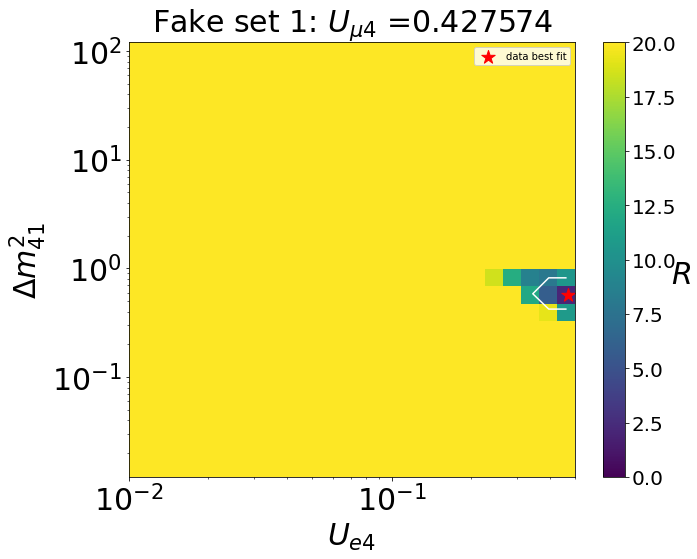

/usr/lib/python3/dist-packages/ipykernel_launcher.py:44: UserWarning: The following kwargs were not used by contour: 'fontsize'


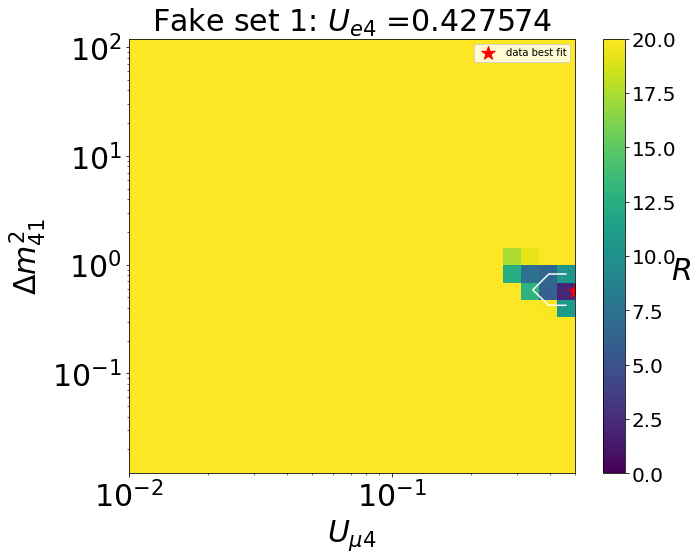

/usr/lib/python3/dist-packages/ipykernel_launcher.py:67: UserWarning: The following kwargs were not used by contour: 'fontsize'


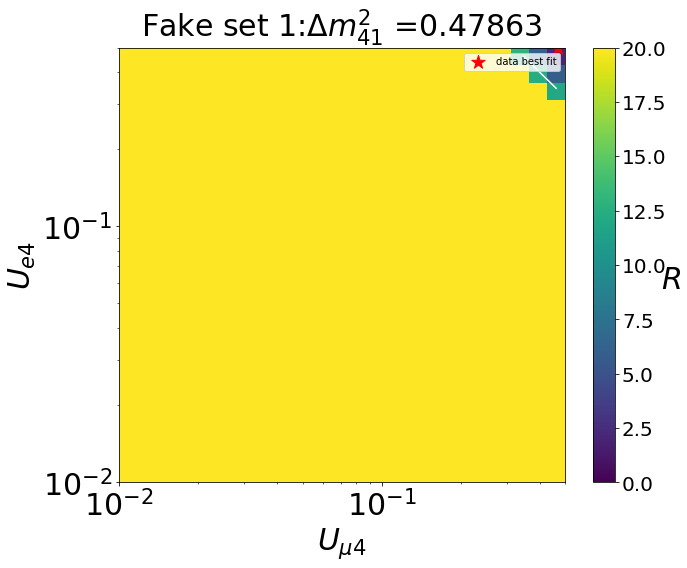

In [24]:
# make projections at fake data best fit
def fmt(x):
    s = f"{x*100:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"


# picking slices m41,ue,umu4
# global best fit: 13,16,17
# fake data set 1: 10,24,24
# fake data set 2: 15,0,20

# at umu4: 
print(ue4_list)
y,x = np.meshgrid(m41_list, ue4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens1[:,:,24],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=30)
#contour plots
y,x = np.meshgrid(m41_center, ue4_center)
contours = plt.contour(x, y, confidence_arr1[:,:,24],[.9], colors='white',fontsize=20,label="wilks 90% CL")
plt.scatter(chi2_min1[2],chi2_min1[1],marker="*",color ="red",label="data best fit",s=200)
plt.xlabel(r"$U_{e4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"Fake set 1: $U_{\mu4}$ ="+str(um4_list[24]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
pkl.dump(fig,open("fakedata1_umu4_bfslice.p",'wb'))
plt.show()
plt.close()

# at ue4
y,x = np.meshgrid(m41_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens1[24,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=30)
#contour plots
y,x= np.meshgrid(m41_center, um4_center)
contours = plt.contour(x, y, confidence_arr1[24,:,:].transpose(),[.9], colors='white',fontsize=20)
plt.scatter(chi2_min1[3],chi2_min1[1],marker="*",color ="red",label="data best fit",s=200)
plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"Fake set 1: $U_{e4}$ ="+str(ue4_list[24]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
pkl.dump(fig,open("fakedata1_ue4_bfslice.p",'wb'))
plt.show()
plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens1[:,10,:],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=30)
#contour plots
x,y = np.meshgrid(ue4_center, um4_center)
contours = plt.contour(x, y, confidence_arr1[:,10,:],[.9], colors='white',fontsize=20);
plt.scatter(chi2_min1[2],chi2_min1[3],marker="*",color ="red",label="data best fit",s=200)
plt.ylabel(r"$U_{e4}$",fontsize=30)
plt.xlabel(r"$U_{\mu4}$",fontsize=30)
plt.title(r"Fake set 1:$\Delta m^2_{41}$ ="+str(m41_list[10]),fontsize=30)
plt.yscale("log")
plt.xscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
pkl.dump(fig,open("fakedata1_m41_bfslice.p",'wb'))
plt.show()
plt.close()


[0.01, 0.0116939, 0.0136747, 0.015991, 0.0186997, 0.0218672, 0.0255713, 0.0299028, 0.034968, 0.0408911, 0.0478176, 0.0559174, 0.0653891, 0.0764653, 0.0894176, 0.104564, 0.122276, 0.142988, 0.167209, 0.195532, 0.228653, 0.267384, 0.312675, 0.365639, 0.427574, 0.5]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:22: UserWarning: No contour levels were found within the data range.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'fontsize', 'label'


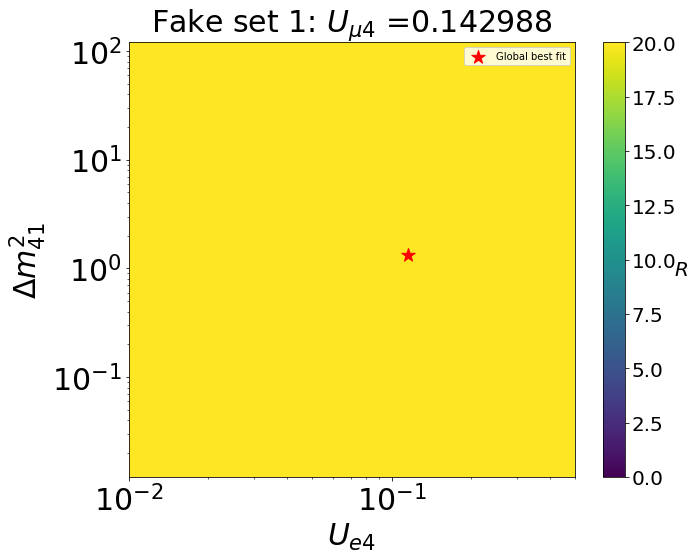

/usr/lib/python3/dist-packages/ipykernel_launcher.py:45: UserWarning: No contour levels were found within the data range.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:45: UserWarning: The following kwargs were not used by contour: 'fontsize'


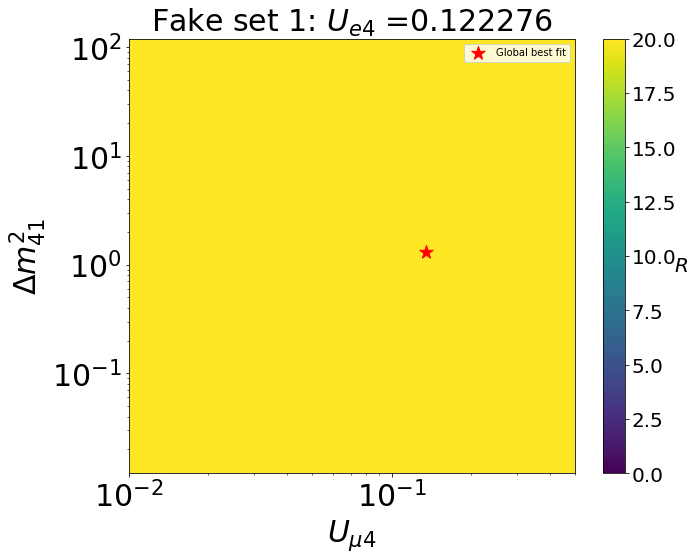

/usr/lib/python3/dist-packages/ipykernel_launcher.py:68: UserWarning: No contour levels were found within the data range.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:68: UserWarning: The following kwargs were not used by contour: 'fontsize'


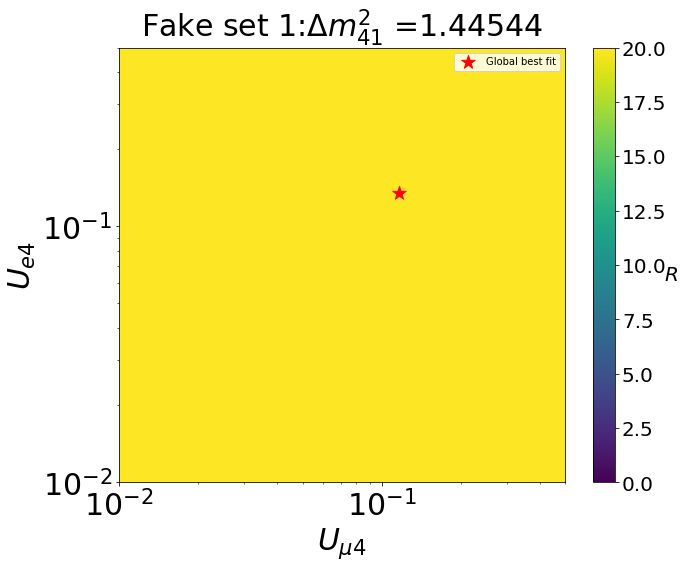

In [25]:
# repeat for global best fit
def fmt(x):
    s = f"{x*100:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"

# norm=colors.Normalize(vmin=1e-13, vmax=20)

# picking slices m41,ue,umu4
# global best fit: 13,16,17
# fake data set 1: 8,24,23
# fake data set 2: 15,0,20

# at umu4: 
print(ue4_list)
y,x = np.meshgrid(m41_list, ue4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens1[:,:,17],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=20)
#contour plots
y,x = np.meshgrid(m41_center, ue4_center)
contours = plt.contour(x, y, confidence_arr1[:,:,17],[.9], colors='white',fontsize=20,label="wilks 90% CL")
plt.scatter([.116],[1.32],marker="*",color ="red",label="Global best fit",s=200)
plt.xlabel(r"$U_{e4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"Fake set 1: $U_{\mu4}$ ="+str(um4_list[17]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
pkl.dump(fig,open("fakedata1_umu4_gbfslice.p",'wb'))
plt.show()
plt.close()

# at ue4
y,x = np.meshgrid(m41_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens1[16,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=20)
#contour plots
y,x= np.meshgrid(m41_center, um4_center)
contours = plt.contour(x, y, confidence_arr1[16,:,:].transpose(),[.9], colors='white',fontsize=20)
plt.scatter([.135],[1.32],marker="*",color ="red",label="Global best fit",s=200)
plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.title(r"Fake set 1: $U_{e4}$ ="+str(ue4_list[16]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.legend()
pkl.dump(fig,open("fakedata1_ue4_gbfslice.p",'wb'))
plt.show()
plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens1[:,13,:],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=20)
#contour plots
x,y = np.meshgrid(ue4_center, um4_center)
contours = plt.contour(x, y, confidence_arr1[:,13,:],[.9], colors='white',fontsize=20);
plt.scatter([.116],[.135],marker="*",color ="red",label="Global best fit",s=200)
plt.ylabel(r"$U_{e4}$",fontsize=30)
plt.xlabel(r"$U_{\mu4}$",fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.title(r"Fake set 1:$\Delta m^2_{41}$ ="+str(m41_list[13]),fontsize=30)
plt.yscale("log")
plt.xscale("log")
plt.legend()
pkl.dump(fig,open("fakedata1_m41_gbfslice.p",'wb'))
plt.show()
plt.close()


[0.01, 0.0116939, 0.0136747, 0.015991, 0.0186997, 0.0218672, 0.0255713, 0.0299028, 0.034968, 0.0408911, 0.0478176, 0.0559174, 0.0653891, 0.0764653, 0.0894176, 0.104564, 0.122276, 0.142988, 0.167209, 0.195532, 0.228653, 0.267384, 0.312675, 0.365639, 0.427574, 0.5]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'fontsize', 'label'
  app.launch_new_instance()


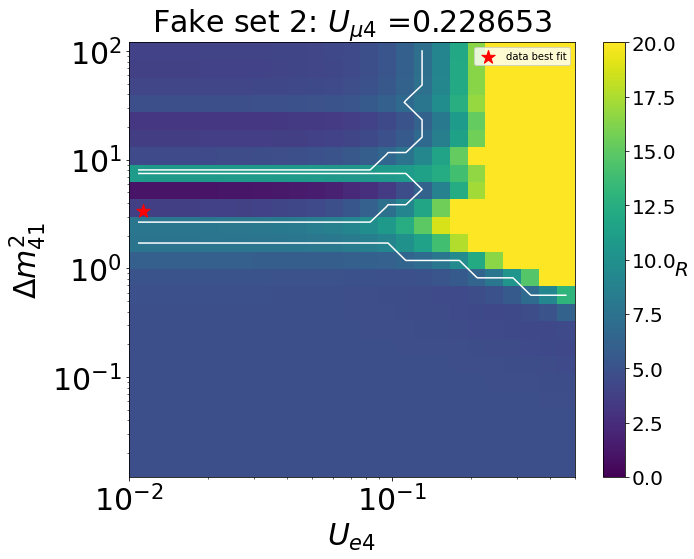

/usr/lib/python3/dist-packages/ipykernel_launcher.py:39: UserWarning: The following kwargs were not used by contour: 'fontsize'


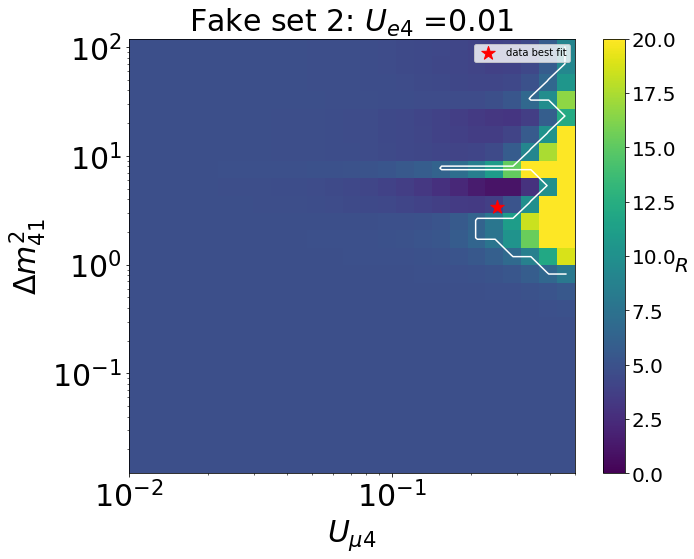

/usr/lib/python3/dist-packages/ipykernel_launcher.py:62: UserWarning: The following kwargs were not used by contour: 'fontsize'


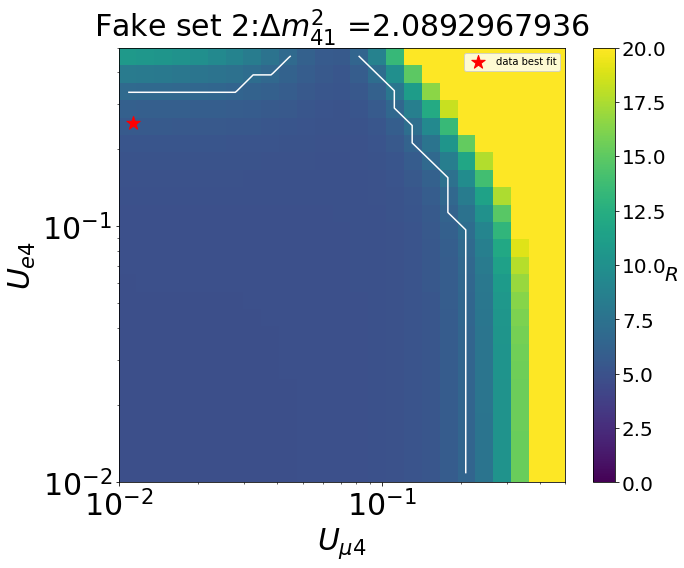

In [26]:
# now doing fake data set 2
# picking slices m41,ue,umu4
# global best fit: 13,16,17
# fake data set 1: 10,24,24
# fake data set 2: 13,0,20

# at umu4: 
print(ue4_list)
y,x = np.meshgrid(m41_list, ue4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens2[:,:,20],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=20)
#contour plots
y,x = np.meshgrid(m41_center, ue4_center)
contours = plt.contour(x, y, confidence_arr2[:,:,20],[.9], colors='white',fontsize=20,label="wilks 90% CL")
plt.scatter(chi2_min2[2],chi2_min2[1]**2,marker="*",color ="red",label="data best fit",s=200)
plt.xlabel(r"$U_{e4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"Fake set 2: $U_{\mu4}$ ="+str(um4_list[20]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
pkl.dump(fig,open("fakedata2_umu4_bfslice.p",'wb'))
plt.show()
plt.close()

# at ue4
y,x = np.meshgrid(m41_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens2[0,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=20)
#contour plots
y,x = np.meshgrid(m41_center, um4_center)
contours = plt.contour(x, y, confidence_arr2[0,:,:].transpose(),[.9], colors='white',fontsize=20)
plt.scatter(chi2_min2[3],chi2_min2[1]**2,marker="*",color ="red",label="data best fit",s=200)
plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"Fake set 2: $U_{e4}$ ="+str(ue4_list[0]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
pkl.dump(fig,open("fakedata2_ue4_bfslice.p",'wb'))
plt.show()
plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens2[:,13,:],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=20)
#contour plots
x,y = np.meshgrid(ue4_center, um4_center)
contours = plt.contour(x, y, confidence_arr2[:,13,:],[.9], colors='white',fontsize=20);
plt.scatter(chi2_min2[2],chi2_min2[3],marker="*",color ="red",label="data best fit",s=200)
plt.ylabel(r"$U_{e4}$",fontsize=30)
plt.xlabel(r"$U_{\mu4}$",fontsize=30)
plt.title(r"Fake set 2:$\Delta m^2_{41}$ ="+str(m41_list[13]**2),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
pkl.dump(fig,open("fakedata2_m41_bfslice.p",'wb'))
plt.show()
plt.close()


[0.01, 0.0116939, 0.0136747, 0.015991, 0.0186997, 0.0218672, 0.0255713, 0.0299028, 0.034968, 0.0408911, 0.0478176, 0.0559174, 0.0653891, 0.0764653, 0.0894176, 0.104564, 0.122276, 0.142988, 0.167209, 0.195532, 0.228653, 0.267384, 0.312675, 0.365639, 0.427574, 0.5]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'fontsize', 'label'


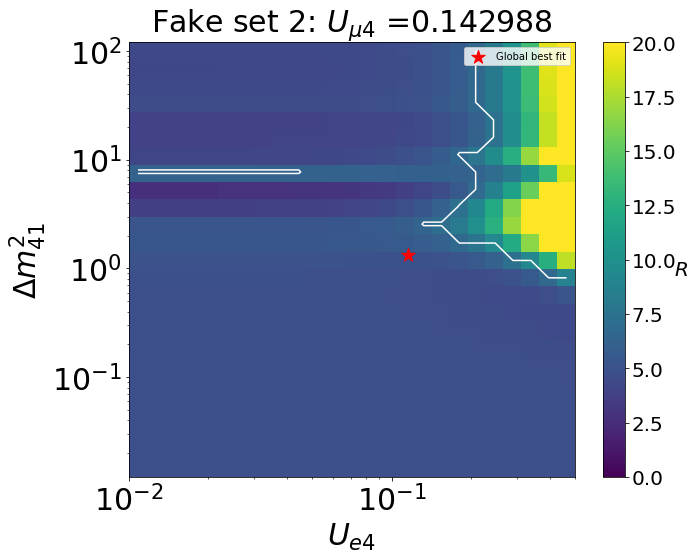

/usr/lib/python3/dist-packages/ipykernel_launcher.py:45: UserWarning: The following kwargs were not used by contour: 'fontsize'


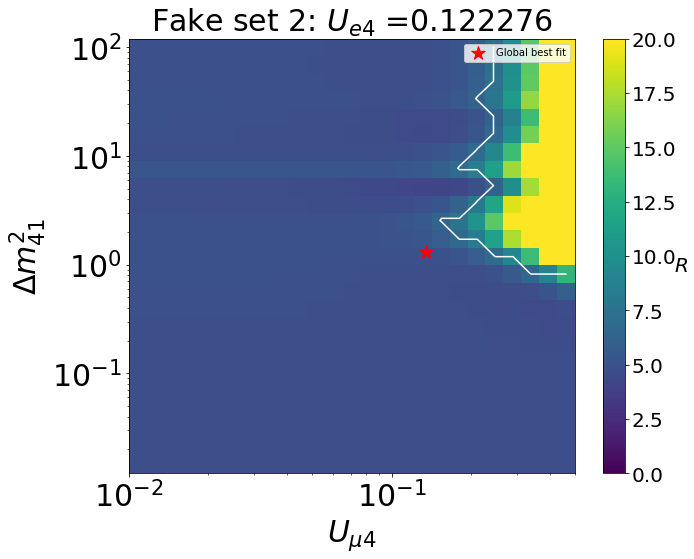

/usr/lib/python3/dist-packages/ipykernel_launcher.py:68: UserWarning: The following kwargs were not used by contour: 'fontsize'


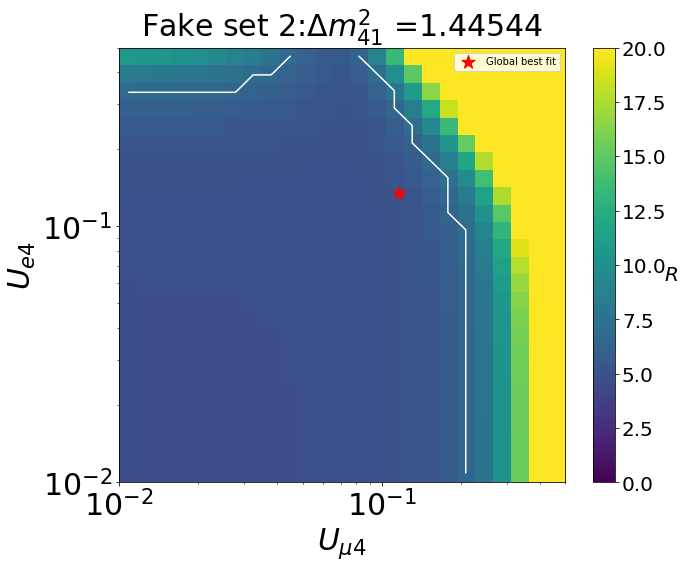

In [27]:
# repeat for global best fit
def fmt(x):
    s = f"{x*100:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"

# norm=colors.Normalize(vmin=1e-13, vmax=20)

# picking slices m41,ue,umu4
# global best fit: 13,16,17
# fake data set 1: 8,24,23
# fake data set 2: 15,0,20

# at umu4: 
print(ue4_list)
y,x = np.meshgrid(m41_list, ue4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens2[:,:,17],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=20)
#contour plots
y,x = np.meshgrid(m41_center, ue4_center)
contours = plt.contour(x, y, confidence_arr2[:,:,17],[.9], colors='white',fontsize=20,label="wilks 90% CL")
plt.scatter([.116],[1.32],marker="*",color ="red",label="Global best fit",s=200)
plt.xlabel(r"$U_{e4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"Fake set 2: $U_{\mu4}$ ="+str(um4_list[17]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
pkl.dump(fig,open("fakedata2_umu4_gbfslice.p",'wb'))
plt.show()
plt.close()

# at ue4
y,x = np.meshgrid(m41_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens2[16,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=20)
#contour plots
y,x= np.meshgrid(m41_center, um4_center)
contours = plt.contour(x, y, confidence_arr2[16,:,:].transpose(),[.9], colors='white',fontsize=20)
plt.scatter([.135],[1.32],marker="*",color ="red",label="Global best fit",s=200)
plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"Fake set 2: $U_{e4}$ ="+str(ue4_list[16]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
pkl.dump(fig,open("fakedata2_ue4_gbfslice.p",'wb'))
plt.show()
plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens2[:,13,:],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=20)
#contour plots
x,y = np.meshgrid(ue4_center, um4_center)
contours = plt.contour(x, y, confidence_arr2[:,13,:],[.9], colors='white',fontsize=20);
plt.scatter([.116],[.135],marker="*",color ="red",label="Global best fit",s=200)
plt.ylabel(r"$U_{e4}$",fontsize=30)
plt.xlabel(r"$U_{\mu4}$",fontsize=30)
plt.title(r"Fake set 2:$\Delta m^2_{41}$ ="+str(m41_list[13]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
pkl.dump(fig,open("fakedata2_m41_gbfslice.p",'wb'))
plt.show()
plt.close()


In [44]:
import scipy.stats

def poisson_errors(k, CL = 0.6827):
    
    # 1 Sig = 0.6827
    # 2 Sig = 0.9545
    # 3 Sig = 0.9973
    print("Poisson errors:",k)
    k=np.array(k)
    a = 1.0 - CL
    low, high = (stats.chi2.ppf(a/2, 2*k) / 2, stats.chi2.ppf(1-a/2, 2*k + 2) / 2)
    low = np.where(k==0,0,low)
    return k - low, high - k

# now make a funtion for spectra plotting
def plothist(data_e,data_m,spec_e,spec_m,bins_e,bins_m,datatitle,cv_e,cv_m,colors_e,colors_m,labels_e,labels_m,cov_e,cov_m):
#     change cov to be total
    cov_e=[cov_e[i]*((spec_e[0][i]+spec_e[1][i]+spec_e[2][i])**2) for i in range(len(bins_e)-1)]
    cov_m=[cov_m[i]*((spec_m[0][i]+spec_m[1][i]+spec_m[2][i])**2) for i in range(len(bins_m)-1)]
    
    #adjust the last two bins of 1e1p because of width
    data_e[-1]=data_e[-1]/float(4.0)
    data_e[-2]=data_e[-2]/float(8.0)
    cv_e[-1]=cv_e[-1]/float(4.0)
    cv_e[-2]=cv_e[-2]/float(8.0)
    cov_e[-1]=cov_e[-1]/float(4.0)
    cov_e[-2]=cov_e[-2]/float(8.0)
    for spec in spec_e:
        spec[-1]=spec[-1]/float(4.0)
        spec[-2]=spec[-2]/float(8.0)
   
    #set overall paramters
    fonts=20
    ymax_e=50
    ymax_m=500
    
    # get centers of bins
    centers_e=[]
    centers_m=[]
    for i in range(len(bins_e)-1):
        centers_e.append(((bins_e[i+1]-bins_e[i])/2.0)+bins_e[i])
    print(centers_e)
    for i in range(len(bins_m)-1):
        centers_m.append(((bins_m[i+1]-bins_m[i])/2.0)+bins_m[i])
        
    # set size of xerr for data points (half bin width)
    xerr_e=[50,50,50,50,50,50,50,50,50,50,200,400]
    xerr_m=[25 for i in range(len(data_m))]
    #now get the y error
    
 
    yerr_e = poisson_errors(data_e)
    yerr_m = poisson_errors(data_m)
    # get size of MC error
    mcerr_e=[math.sqrt(val) for val in cov_e]
    mcerr_m=[math.sqrt(val) for val in cov_m]
    errboxes_sys_e = []
    errboxes_sys_m = []

    for i in range(len(centers_e)):
        rect0 = Rectangle((bins_e[i],((spec_e[0][i]+spec_e[1][i]+spec_e[2][i]+spec_e[3][i])-mcerr_e[i])),xerr_e[i]*2,mcerr_e[i]*2)
        errboxes_sys_e.append(rect0)
    pc_sys_e = PatchCollection(errboxes_sys_e,facecolor=None,alpha=.1,hatch='/',zorder=12)
    
    for i in range(len(centers_m)):
        rect0 = Rectangle((bins_m[i],((spec_m[0][i]+spec_m[1][i]+spec_m[2][i])-mcerr_m[i])),xerr_m[i]*2,mcerr_m[i]*2)
        errboxes_sys_m.append(rect0)
    pc_sys_m = PatchCollection(errboxes_sys_m,facecolor=None,alpha=.1,hatch='/',zorder=12)
    
    # now get historams for the 1e1p and plot  
    fig,ax = plt.subplots(figsize=(10,8))
    ax.set_ylim(0,ymax_e)
    ax.set_xlim(200,2400)
    # for cv, we just want a dashed line
    ax.step(bins_e,cv_e,color='red',linestyle = '-.',label="Null Osc prediction",linewidth=5)
    # next is data
    plt.errorbar(centers_e, data_e, yerr=yerr_e, xerr=xerr_e, fmt='.', capsize=5,color='black',label='Data set: 6.67e20 POT')
    # finally, the best fit prediction
    plt.bar(x=bins_e[:-1], height=spec_e[0], width=np.diff(bins_e), align='edge', fc=colors_e[0], ec='black',label=labels_e[0],alpha=.5)
    plt.bar(x=bins_e[:-1], height=spec_e[1],bottom=np.array(spec_e[0]), width=np.diff(bins_e), align='edge', fc=colors_e[1], ec='black',label=labels_e[1],alpha=.5)
    plt.bar(x=bins_e[:-1], height=spec_e[2],bottom=np.array(spec_e[0])+np.array(spec_e[1]), width=np.diff(bins_e), align='edge', fc=colors_e[2], ec='black',label=labels_e[2],alpha=.5)
    plt.bar(x=bins_e[:-1], height=spec_e[3],bottom=np.array(spec_e[0])+np.array(spec_e[1])+np.array(spec_e[2]), width=np.diff(bins_e), align='edge', fc=colors_e[3], ec='black',label=labels_e[3],alpha=.5)
    ax.add_collection(pc_sys_e)
    plt.legend(fontsize=12)
    plt.xlabel(r'$E_\nu$ [$MeV$]',fontsize=fonts)
    plt.ylabel(r'Number of Events / 100 MeV',fontsize=fonts)
    pkl.dump(fig,open(datatitle+"_1e1p_hist.p",'wb'))
    plt.show()
    plt.close()
    
    fig,ax = plt.subplots(figsize=(10,8))
    ax.set_ylim(0,ymax_m)
    ax.set_xlim(250,1200)
    # for cv, we just want a dashed line
    ax.step(bins_m,cv_m,color='red',linestyle = '-.',label="Null Osc prediction",linewidth=5)
    # next is data
    plt.errorbar(centers_m, data_m, yerr=yerr_m, xerr=xerr_m, fmt='.', capsize=5,color='black',label='Data set: 6.67e20 POT')
    # finally, the best fit prediction
    plt.bar(x=bins_m[:-1], height=spec_m[0], width=np.diff(bins_m), align='edge', fc=colors_m[0], ec='black',label=labels_m[0],alpha=.5)
    plt.bar(x=bins_m[:-1], height=spec_m[1],bottom=np.array(spec_m[0]), width=np.diff(bins_m), align='edge', fc=colors_m[1], ec='black',label=labels_m[1],alpha=.5)
    plt.bar(x=bins_m[:-1], height=spec_m[2],bottom=np.array(spec_m[0])+np.array(spec_m[1]), width=np.diff(bins_m), align='edge', fc=colors_m[2], ec='black',label=labels_m[2],alpha=.5)
    ax.add_collection(pc_sys_m)
    plt.legend(fontsize=12)
    plt.xlabel(r'$E_\nu$ [$MeV$]',fontsize=fonts)
    plt.ylabel(r'Number of Events / 5 MeV',fontsize=fonts)
    plt.title(datatitle+r' 1$\mu$1p Selection',fontsize=fonts)
    pkl.dump(fig,open(datatitle+"_1mu1p_hist.p",'wb'))
    plt.show()
    plt.close()
    return

19 19 19
[250.0, 350.0, 450.0, 550.0, 650.0, 750.0, 850.0, 950.0, 1050.0, 1150.0, 1400.0, 2000.0]
Poisson errors: [4, 5, 3, 2, 5, 5, 1, 1, 1, 3, 0.875, 1.0]
Poisson errors: [23, 185, 292, 334, 353, 400, 462, 435, 372, 305, 279, 228, 190, 190, 133, 119, 75, 60, 54]


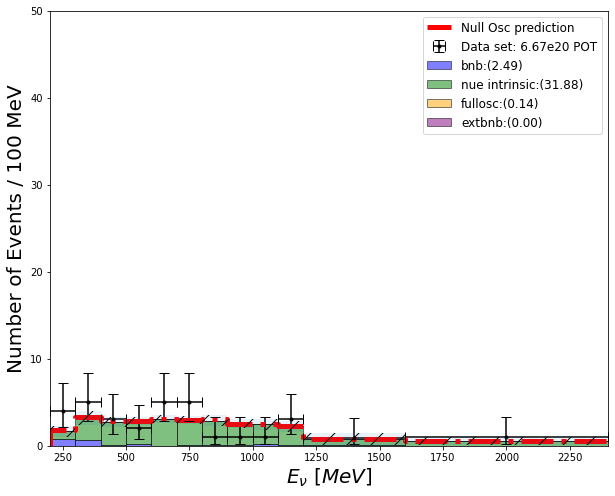

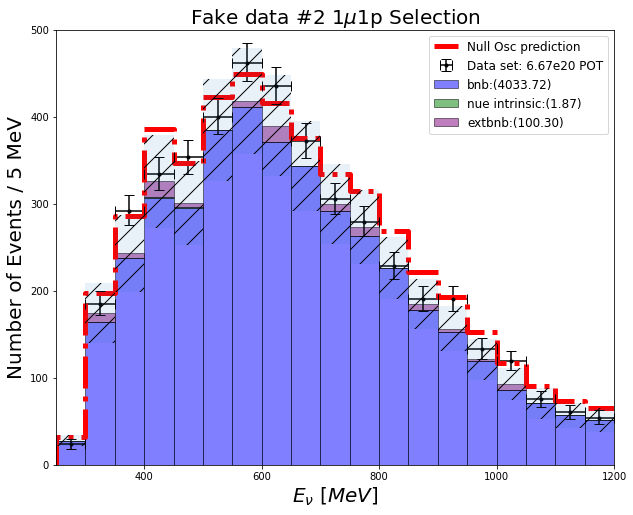

In [ ]:
# sorry I just hardcoded these

bins_e=[200,300,400,500,600,700,800,900,1000,1100,1200,1600,2400]
bins_m=[250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1050,1100,1150,1200]

cv_e=[0,1.77973, 3.299, 2.8411, 2.84015, 3.06677, 2.90407, 2.99971, 2.52731, 2.45532, 2.19775, 6.17792, 2.0456]
cv_m=[0,31.1745, 197.417, 285.531, 385.361, 347.205, 422.695, 449.114, 415.666, 375.7, 334.369, 314.139, 268.595, 221.893, 192.872, 152.109, 116.597, 90.355, 72.8464, 65.4711]

colors_e=["blue","green","orange","purple"]
colors_m=["blue","green","purple"]

fakedata1_e=[20,12,6,6,4,5,0,1,0,1,2,1]
fakedata1_m=[18,128,201,279,236,312,328,314,229,194,177,155,144,148,121,89,63,37,48]
cov1_e=[12.0417, 27.4371, 11.0603, 6.4203, 4.45717, 3.32607, 2.23059, 2.12522, 1.58435, 1.30102, 9.75854, 1.07978]
cov1_m=[45.0548, 1242.2, 2195.51, 3401.63, 2600.42, 3612.67, 3796.75, 3485.05, 2952.05, 2416.99, 2206.82, 1665.94, 1139.38, 983.312, 855.591, 521.652, 486.137, 322.979, 313.641]
spec1_e_bnb=[0.939786, 0.79191, 0.104888, 0.137568, 0, 0.017195, 0.146215, 0.141995, 0.177559, 0.0187067, 0.486315, 0 ]
spec1_e_nue=[0.653852, 2.15496, 2.37625, 2.52549, 2.91912, 2.783, 2.66648, 2.33086, 2.23594, 2.1465, 5.62805, 2.03247]
spec1_e_fullosc=[8.28588, 20.1606, 15.6707, 13.4997, 11.437, 9.15285, 5.99022, 4.86888, 3.20728, 2.17326, 3.84118, 0.41952]
spec1_e_ext=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
spec1_m_bnb=[27.2692, 169.95, 253.874, 336.726, 315.32, 394.153, 417.242, 377.423, 359.554, 313.531, 293.754, 260.695, 209.321, 185.081, 147.268, 107.605, 88.6975, 71.5745, 64.4042]
spec1_m_nue=[0.0237958, 0.232883, 0.377893, 0.393463, 0.221181, 0.167567, 0.123142, 0.0916194, 0.0858461, 0.0253949, 0.0201008, 0.0146099, 0.0106232, 0.00459096, 0.00666406, 0.00303216, 0, 0.00152141, 0.00476309]
spec1_m_ext=[0,10.1207,4.94699,18.4412,4.94699,0,6.74713,18.4412,0,8.32055,10.1207,0,6.74713,3.14684,1.57342,6.74713,0,0,0]
spec1_e = [spec1_e_bnb, spec1_e_nue, spec1_e_fullosc,spec1_e_ext]
spec1_m = [spec1_m_bnb, spec1_m_nue, spec1_m_ext]
print(len(spec1_m_bnb),len(spec1_m_nue),len(spec1_m_ext))


# chi2test_e: 93.7945
# chi2test_m: 22.2264



fakedata2_e=[4,5,3,2,5,5,1,1,1,3,7,4]
fakedata2_m=[23,185,292,334,353,400,462,435,372,305,279,228,190,190,133,119,75,60,54]
cov2_e=[0.167194, 0.0637143, 0.0428048, 0.026791, 0.0215562, 0.024269, 0.0472897, 0.0450752, 0.0625464, 0.0745051, 0.0920382, 0.177687]
cov2_m=[0.0599551, 0.0383987, 0.0327556, 0.0270592, 0.0253559, 0.0232329, 0.0211305, 0.022293, 0.022824, 0.0233555, 0.0239237, 0.0245092, 0.0244174, 0.0277675, 0.0386294, 0.0399143, 0.0617907, 0.0630426, 0.075603]
spec2_e_bnb=[0.803525, 0.671683, 0.0753477, 0.118262, 0, 0.0137415, 0.113916, 0.110892, 0.149816, 0.0149439, 0.414478, 0]
spec2_e_nue=[.816739, 2.48408, 2.61798, 2.69779, 3.06634, 2.88588, 2.74118, 2.38238, 2.2755, 2.17781, 5.68572, 2.0449]
spec2_e_fullosc=[0.00227303, 0.00813618, 0.00932116, 0.00680601, 0.007858, 0.0130166, 0.0148679, 0.01793, 0.0157716, 0.0130769, 0.0289124, 0.00421086]
spec2_e_ext=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
spec2_m_bnb=[27.5162, 163.894, 237.376, 306.762, 295.374, 384.638, 411.046, 370.711, 343.293, 291.143, 262.908, 225.748, 177.226, 152.825, 119.154, 86.058, 70.3315, 56.7694, 50.9511]
spec2_m_nue=[0.0241945, 0.246666, 0.397349, 0.405484, 0.226091, 0.171249, 0.125485, 0.0927543, 0.0874164, 0.0258514, 0.02031, 0.0146549, 0.0106633, 0.00462504, 0.00675383, 0.0030353, 0, 0.00152572, 0.00476627]
spec2_m_ext=[0,10.1207,4.94699,18.4412,4.94699,0,6.74713,18.4412,0,8.32055,10.1207,0,6.74713,3.14684,1.57342,6.74713,0,0,0]
spec2_e = [spec2_e_bnb, spec2_e_nue, spec2_e_fullosc,spec2_e_ext]
spec2_m = [spec2_m_bnb, spec2_m_nue, spec2_m_ext]

#  chi2test_e: 12.2861
# chi2test_m: 12.1563


labels1_e=['bnb:('+"{:.2f}".format(sum(spec1_e_bnb))+')','nue intrinsic:('+"{:.2f}".format(sum(spec1_e_nue))+')','fullosc:('"{:.2f}".format(sum(spec1_e_fullosc))+')','extbnb:('+"{:.2f}".format(sum(spec1_e_ext))+')']
labels1_m=['bnb:('+"{:.2f}".format(sum(spec1_m_bnb))+')','nue intrinsic:('+"{:.2f}".format(sum(spec1_m_nue))+')','extbnb:('+"{:.2f}".format(sum(spec1_m_ext))+')']

labels2_e=['bnb:('+"{:.2f}".format(sum(spec2_e_bnb))+')','nue intrinsic:('+"{:.2f}".format(sum(spec2_e_nue))+')','fullosc:('"{:.2f}".format(sum(spec2_e_fullosc))+')','extbnb:('+"{:.2f}".format(sum(spec2_e_ext))+')']
labels2_m=['bnb:('+"{:.2f}".format(sum(spec2_m_bnb))+')','nue intrinsic:('+"{:.2f}".format(sum(spec2_m_nue))+')','extbnb:('+"{:.2f}".format(sum(spec2_m_ext))+')']


# plothist(fakedata1_e,fakedata1_m,spec1_e,spec1_m,bins_e,bins_m,"Fake data #1",cv_e,cv_m,colors_e,colors_m,labels1_e,labels1_m,cov1_e,cov1_m)
plothist(fakedata2_e,fakedata2_m,spec2_e,spec2_m,bins_e,bins_m,"Fake data #2",cv_e,cv_m,colors_e,colors_m,labels2_e,labels2_m,cov2_e,cov2_m)

19 19 19
[250.0, 350.0, 450.0, 550.0, 650.0, 750.0, 850.0, 950.0, 1050.0, 1150.0, 1400.0, 2000.0]
Poisson errors: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0]
Poisson errors: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


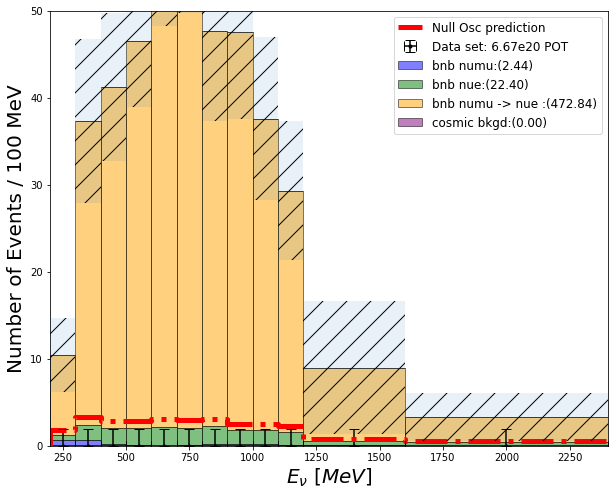

In [ ]:
bins_e=[200,300,400,500,600,700,800,900,1000,1100,1200,1600,2400]
bins_m=[250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1050,1100,1150,1200]

cv_e=[0,1.77973, 3.299, 2.8411, 2.84015, 3.06677, 2.90407, 2.99971, 2.52731, 2.45532, 2.19775, 6.17792, 2.0456]
cv_m=[0,31.1745, 197.417, 285.531, 385.361, 347.205, 422.695, 449.114, 415.666, 375.7, 334.369, 314.139, 268.595, 221.893, 192.872, 152.109, 116.597, 90.355, 72.8464, 65.4711]

colors_e=["blue","green","orange","purple"]
colors_m=["blue","green","purple"]

fakedata1_e=[0,0,0,0,0,0,0,0,0,0,0,0]
fakedata1_m=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
cov1_e=[0.167194, 0.0637143, 0.0428048, 0.026791, 0.0215562, 0.024269, 0.0472897, 0.0450752, 0.0625464, 0.0745051, 0.0920382, 0.177687]
cov1_m=[0.0599551, 0.0383987, 0.0327556, 0.0270592, 0.0253559, 0.0232329, 0.0211305, 0.022293, 0.022824, 0.0233555, 0.0239237, 0.0245092, 0.0244174, 0.0277675, 0.0386294, 0.0399143, 0.0617907, 0.0630426, 0.075603]
spec1_e_bnb=[0.589186, 0.6133, 0.147715, 0.111786, 0, 0.0119807, 0.210099, 0.135111, 0.159141, 0.00937054, 0.452594, 0]
spec1_e_nue=[0.593242, 1.74012, 1.84722, 1.85762, 2.17917, 2.02399, 1.9936, 1.64192, 1.58862, 1.52325, 3.99206, 1.42266]
spec1_e_fullosc=[9.22658, 34.9629, 39.2112, 44.5074, 54.3722, 56.7986, 45.409, 45.8077, 35.8327, 27.7784, 67.2973, 11.6316]
spec1_e_ext=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
spec1_m_bnb=[21.9934, 132.171, 200.962, 258.556, 238.509, 296.791, 313.204, 279.182, 262.156, 227.654, 209.634, 187.026, 148.594, 132.661, 106.882, 75.5337, 64.3955, 50.7209, 45.6543]
spec1_m_nue=[0.0174169, 0.166219, 0.282361, 0.276099, 0.155719, 0.115561, 0.0902525, 0.0684945, 0.0646148, 0.0193197, 0.0142452, 0.0129539, 0.00579129, 0.00262753, 0.0048515, 0.00219299, 0, 0.00063412, 0.00363934]
spec1_m_ext=[0,10.1207,4.94699,18.4412,4.94699,0,6.74713,18.4412,0,8.32055,10.1207,0,6.74713,3.14684,1.57342,6.74713,0,0,0]
spec1_e = [spec1_e_bnb, spec1_e_nue, spec1_e_fullosc,spec1_e_ext]
spec1_m = [spec1_m_bnb, spec1_m_nue, spec1_m_ext]
print(len(spec1_m_bnb),len(spec1_m_nue),len(spec1_m_ext))

labels1_e=['bnb numu:('+"{:.2f}".format(sum(spec1_e_bnb))+')','bnb nue:('+"{:.2f}".format(sum(spec1_e_nue))+')','bnb numu -> nue :('"{:.2f}".format(sum(spec1_e_fullosc))+')','cosmic bkgd:('+"{:.2f}".format(sum(spec1_e_ext))+')']
labels1_m=['bnb numu:('+"{:.2f}".format(sum(spec1_m_bnb))+')','bnb nue:('+"{:.2f}".format(sum(spec1_m_nue))+')','cosmic bkgd:('+"{:.2f}".format(sum(spec1_m_ext))+')']

plothist(fakedata1_e,fakedata1_m,spec1_e,spec1_m,bins_e,bins_m,"Example oscillation Spectra",cv_e,cv_m,colors_e,colors_m,labels1_e,labels1_m,cov1_e,cov1_m)
# plothist(fakedata2_e,fakedata2_m,spec2_e,spec2_m,bins_e,bins_m,"Fake data #2",cv_e,cv_m,colors_e,colors_m,labels2_e,labels2_m,cov2_e,cov2_m)